In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
from google.colab  import auth
import gspread
from google.auth import default
import pandas as pd

In [ ]:
auth.authenticate_user()
creds,_=default()
gc = gspread.authorize(creds)
worksheet =  gc.open('data').sheet1
data = worksheet.get_all_values()
df=pd.DataFrame(data[1:], columns=data[0])
df=df.astype({'X':'int'})
df=df.astype({'Y':'int'})
df.head()

,X,Y
0,1,11
1,2,12
2,3,25
3,4,25
4,5,65


In [ ]:
X = df[['X']].values
Y = df[['Y']].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)
ai_brain = Sequential([
    Dense(8,activation = 'relu'),
    Dense(10,activation = 'relu'),
    Dense(1)
])

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1908.5120
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1907.3673
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 1906.5193
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 1905.8016
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 1905.1569
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 1904.5568
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 1903.9866
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 1903.4169
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 1902.8757
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 1902.3398
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1901.8036
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 1901.2833
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1900.6998
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1900.0901
Epoch 15/2000
1/1 ━━━━━━

array([[37.899055]], dtype=float32)

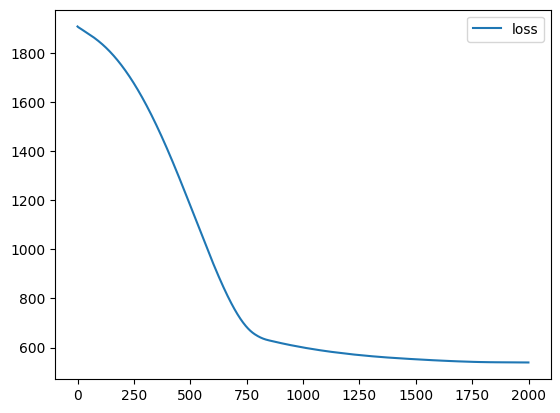

In [ ]:
ai_brain.compile(optimizer= 'rmsprop',loss = 'mse')
ai_brain.fit(X_train1,Y_train,epochs= 2000)
loss_df = pd.DataFrame(ai_brain.history.history)
loss_df.plot()
X_test1 = Scaler.transform(X_test)
ai_brain.evaluate(X_test1,Y_test)
X_n1 = [[6]]
X_n1_1 = Scaler.transform(X_n1)
ai_brain.predict(X_n1_1 )


In [ ]:
X_test1 = Scaler.transform(X_test)
ai_brain.evaluate(X_test1,Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 771.1777


771.1776733398438

In [ ]:
X_n1 = [[6]]
X_n1_1 = Scaler.transform(X_n1)
ai_brain.predict(X_n1_1 )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[38.16734]], dtype=float32)